In [ ]:
import json

# Load the JSON data from the file
with open('results/files/2.json', 'r') as file:
    data = json.load(file)

In [30]:
def display_prediction(number):
    if 0 <= number < len(data):
        entry = data[number]
        
        # Display the question
        print(f"Question: {entry['question']}")
        
        # Display the image
        from IPython.display import Image, display
        image_path = f"dataset/eval/mathverse/images/{entry['image']}"
        display(Image(filename=image_path, width=200))
        
        # Display the predicted answer
        print(f"Predicted Answer: {entry['predicted_answer']}")
        
        from IPython.display import display, HTML
        display(HTML(f"<span style='color: green;'>Predicted Extracted Answer: {entry['extracted_answer']}</span>"))
        display(HTML(f"<span style='color: red; font-weight: bold;'>Correct Answer: {entry['answer']}</span>"))
    else:
        print(f"Invalid number: {number}. It should be between 0 and {len(data) - 1}.")


Question: As shown in the figure, it is known that angle A = 80.0, angle B = 60.0, DE parallel BC, then the size of angle CED is ()
Choices:
A:40°
B:60°
C:120°
D:140°


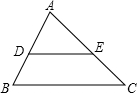

Predicted Answer: To find the measure of angle CED, we can use the fact that the angles in a triangle sum up to 180°. Given that angle A = 80° and angle B = 60°, we can calculate the measure of angle CED as follows:

1. Sum of angles in triangle ABC:
   Angle A + Angle B + Angle CED = 180°
   80° + 60° + Angle CED = 180°

2. Solve for Angle CED:
   Angle CED = 180° - (80° + 60°)
   Angle CED = 180° - 140°
   Angle CED = 40°

Therefore, the correct answer is A: 40°.


In [32]:
display_prediction(0)

Question: 


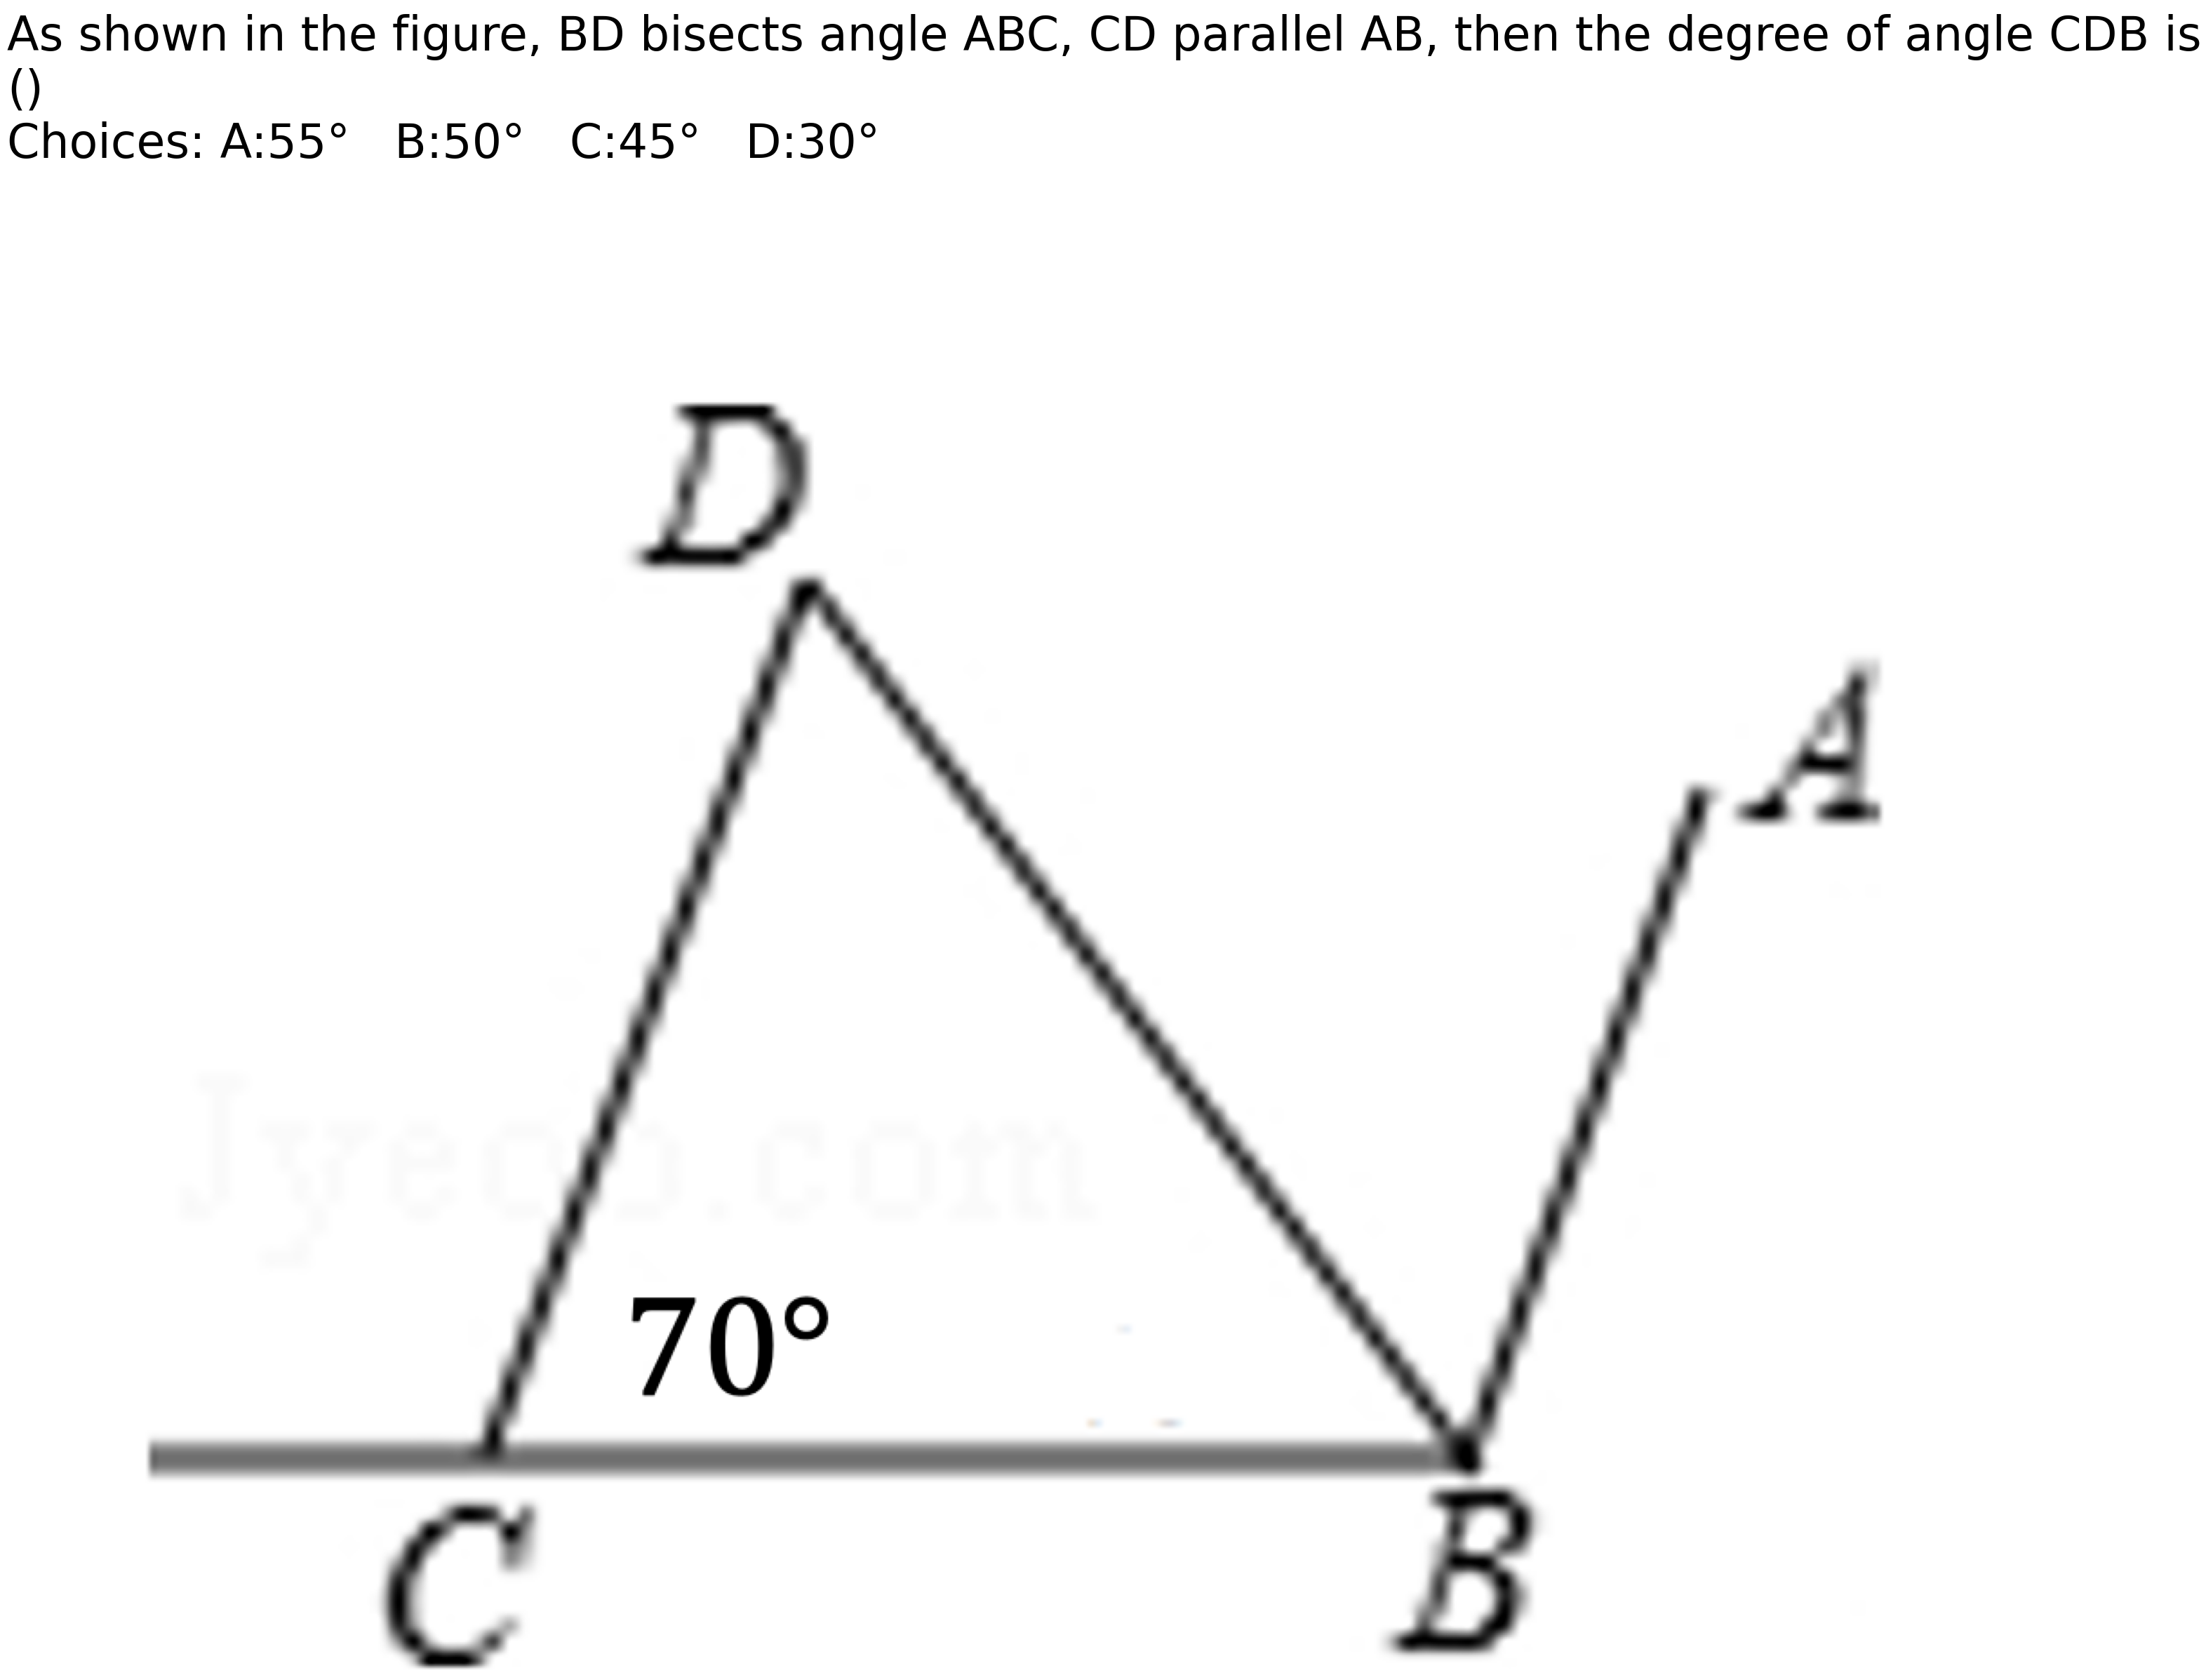

Predicted Answer: To solve the problem, follow these steps:

1. **Identify the given angles and their measures:**
   - Angle \( \angle ABC \) is 70°.
   - Angle \( \angle BCD \) is \( \angle A \) + \( \angle B \).
   - Angle \( \angle BCD \) is \( \angle A \) + \( \angle B \).
   - Angle \( \angle BCD \) is \( \angle A \) + \( \angle B \).
   - Angle \( \angle BCD \) is \( \angle A \) + \( \angle B \).
   - Angle \( \angle BCD \) is \( \angle A \) + \( \angle B \).
   - Angle \( \angle BCD \) is \( \angle A \) + \( \angle B \).
   - Angle \( \angle BCD \) is \( \angle A \) + \( \angle B \).
   - Angle \( \angle BCD \) is \( \angle A \) + \( \angle B \).
   - Angle \( \angle BCD \) is \( \angle A \) + \( \angle B \).
   - Angle \( \angle BCD \) is \( \angle A \) + \( \angle B \).
   - Angle \( \angle BCD \) is \( \angle A \) + \( \angle B \).
   - Angle \( \angle BCD \) is \( \angle A \) + \( \angle B \).
   - Angle \( \angle BCD \) is \( \angle A \) + \( \angle B \).
   - Angle \( \ang

In [33]:
display_prediction(5)